# A base de dados

### Carregando o dataset

In [18]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd

dados = pd.read_csv('Bicicletas.csv')

### Conhecendo a base de dados

In [ ]:
dados.head()

,clima,temperatura,bicicletas_alugadas
0,2,0.363625,985
1,2,0.353739,801
2,1,0.189405,1349
3,1,0.212122,1562
4,1,0.229270,1600


In [ ]:
dados.shape

(731, 3)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'temperatura')

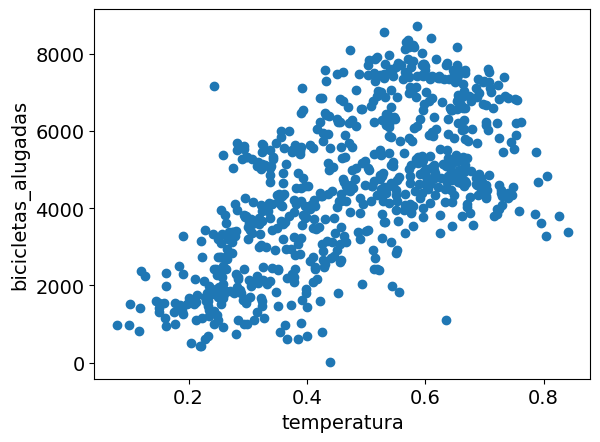

In [ ]:
plt.rcParams.update({'font.size': 14})
plt.scatter(dados['temperatura'],dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('temperatura')

([<matplotlib.axis.XTick at 0x6495ea5dc0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

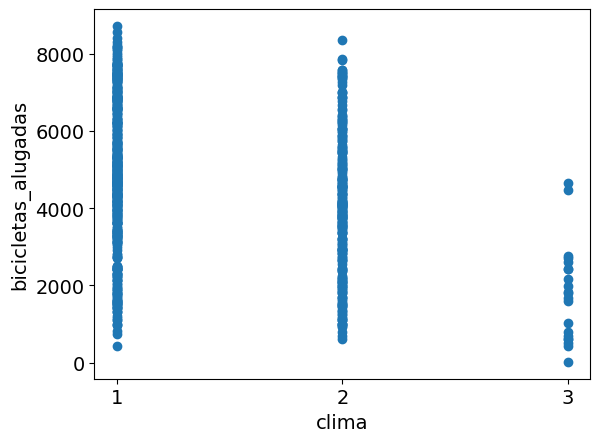

In [ ]:
plt.scatter(dados['clima'],dados['bicicletas_alugadas'])
plt.ylabel('bicicletas_alugadas')
plt.xlabel('clima')
plt.rcParams.update({'font.size': 22})
indice=[1,2,3]
plt.xticks(indice, fontsize=14)

### Normalizando a base de dados

In [ ]:
import numpy as np

In [ ]:
y = dados['bicicletas_alugadas'].values

In [20]:
y

array([0.11303649, 0.09192105, 0.15480835, 0.17925178, 0.18361258,
       0.18430112, 0.17328437, 0.11005279, 0.09433096, 0.15159513,
       0.14493918, 0.13334863, 0.16134955, 0.16307092, 0.14321781,
       0.13816846, 0.11475786, 0.07837962, 0.18935047, 0.2211384 ,
       0.17707138, 0.11257746, 0.11315125, 0.16249713, 0.22779435,
       0.05806748, 0.04946064, 0.13392242, 0.12600413, 0.12577462,
       0.17225155, 0.15607069, 0.1751205 , 0.17787468, 0.19600643,
       0.11533165, 0.18625201, 0.19646546, 0.17557953, 0.18418637,
       0.17649759, 0.20036723, 0.16892357, 0.18235024, 0.21953179,
       0.20828552, 0.24271288, 0.28402571, 0.33589626, 0.1876291 ,
       0.20794124, 0.12703695, 0.1663989 , 0.21999082, 0.20736745,
       0.16766123, 0.22595823, 0.27564838, 0.16593987, 0.2124168 ,
       0.24489328, 0.193367  , 0.22308928, 0.23835208, 0.06942851,
       0.21482672, 0.24477852, 0.21700711, 0.07149415, 0.22687629,
       0.24466376, 0.27736975, 0.23479458, 0.23594216, 0.25154

In [ ]:
X = dados[['clima','temperatura']].values
print(X)

[[2.       0.363625]
 [2.       0.353739]
 [1.       0.189405]
 ...
 [2.       0.2424  ]
 [1.       0.2317  ]
 [2.       0.223487]]


In [ ]:
X = X/np.amax(X,axis=0)
print(X)

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 ...
 [0.66666667 0.28826395]
 [0.33333333 0.27553942]
 [0.66666667 0.26577246]]


In [ ]:
ymax=np.amax(y)
y = y/ymax
print(y[0:10])

[0.11303649 0.09192105 0.15480835 0.17925178 0.18361258 0.18430112
 0.17328437 0.11005279 0.09433096 0.15159513]


### Funções de ativação

In [ ]:
def sigmoid(Soma):
    return 1/(1+np.exp(-Soma))

def relu(Soma):
    return np.maximum(0,Soma)

### Criando a estrutura da rede

In [ ]:
arquitetura = [
    {"dim_entrada": 2, "dim_saida": 50, "ativacao": "relu"},
    {"dim_entrada": 50, "dim_saida": 1, "ativacao": "sigmoid"},
]

### Pesos e viés

In [ ]:
def inicia_camadas(arquitetura, seed = 99):
    # inicia os valores aleatórios
    np.random.seed(seed)
    # numero de camadas da rede neural
    numero_de_camadas = len(arquitetura)
    # inicia armazenamento de parametros
    valores_parametros = {}
    
    # itera nas camadas da rede
    for indice, camada in enumerate(arquitetura):
        
        indice_camada = indice + 1
        
        # extrai o numero de nodos nas camadas
        tamanho_camada_entrada = camada["dim_entrada"]
        tamanho_camada_saida = camada["dim_saida"]
        
        # inicia os valores na matriz de pesos P
        # e o vetor de viés ou bias b
        valores_parametros['P' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, tamanho_camada_entrada)  * 0.1
        valores_parametros['b' + str(indice_camada)] = np.random.randn(
            tamanho_camada_saida, 1) * 0.1
        
    return valores_parametros

### Propagação da rede

In [ ]:
def propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, ativacao="relu"):
    # cálculo da entrada para a função de ativação
    Saida_atual = np.dot(Pesos_atual, Ativado_anterior) + b_atual
    
    # selecção da função de ativação
    if ativacao is "relu":
        func_ativacao = relu
    elif ativacao is "sigmoid":
        func_ativacao = sigmoid
    else:
        raise Exception('Ainda não implementamos essa funcao')
        
    # retorna a ativação calculada Ativado_atual e a matriz intermediária Saida
    return func_ativacao(Saida_atual), Saida_atual

In [ ]:
def propaga_total(X, valores_parametros, arquitetura):
    # memoria temporaria para a retropropagacao
    memoria = {}
    # O vetor X é a ativação para a camada 0 
    Ativado_atual = X
    
    # iterações para as camadas
    for indice, camada in enumerate(arquitetura):
        # a numeração das camadas começa de 1
        indice_camada = indice + 1
        # utiliza a ativação da iteração anterior
        Ativado_anterior = Ativado_atual
        
        # extrai a função de ativação para a camada atual
        func_ativacao_atual = camada["ativacao"]
        # extrai os pesos da camada atual
        Pesos_atual = valores_parametros["P" + str(indice_camada)]
        # extrai o bias para a camada atual
        b_atual = valores_parametros["b" + str(indice_camada)]
        # cálculo da ativação para a camada atual
        Ativado_atual, Saida_atual = propaga_uma_camada(Ativado_anterior, Pesos_atual, b_atual, func_ativacao_atual)
        
        # salca os valores calculados na memória
        memoria["A" + str(indice)] = Ativado_anterior
        memoria["Z" + str(indice_camada)] = Saida_atual
       
    # retorna o vetor predito e um dicionário contendo os valores intermediários
    return Ativado_atual, memoria

### Testando a rede

In [ ]:
valores_parametros = inicia_camadas(arquitetura, seed = 99)
y_estimado, memoria = propaga_total(np.transpose(X), valores_parametros, arquitetura)

In [ ]:
y_estimado[0,0]*ymax

In [ ]:
y[0]*ymax

### Atualização dos pesos

In [ ]:
def atualiza(valores_parametros, gradidentes, arquitetura, taxa_aprendizagem):

    # iterações pelas camadas
    for indice_camada, camada in enumerate(arquitetura, 1):
        valores_parametros["P" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["dP" + str(indice_camada)]        
        valores_parametros["b" + str(indice_camada)] -= taxa_aprendizagem * gradidentes["db" + str(indice_camada)]

    return valores_parametros;

### Função de custo

In [ ]:
def valor_de_custo(Y_predito, Y):
    # numero_de_exemplos
    m = Y_predito.shape[1]
    
    custo = -1 / m * (np.dot(Y, np.log(Y_predito).T) + np.dot(1 - Y, np.log(1 - Y_predito).T))
    return np.squeeze(custo)